In [1]:
# import dependencies 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [25]:

# developing the model (logistic regression)

class ScratchLogisticRegression():

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        
        self.n,n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # calculating the gradient descent and hypothesis
        for i in range(self.iter):
            
            # calculating the linear regression
            linear_model = np.dot(X, self.weights) + self.bias
            # calculating for validation values
            linear_model_val = np.dot(X_val, self.weights) + self.bias
            
            # applying sigmoid formula with our linear model
            y_pred = self._sigmoid(linear_model)
            # calculating for validation values
            y_pred_val = self._sigmoid(linear_model_val)
            
            # recalculating our bias and wieghts on every iteration
            # calculating the derivatives
            dw = (1/self.n) * np.dot(X.T, (y_pred - y))
            db = (1/self.n) * np.sum(y_pred - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # calculating the losses
            self.loss[i] = ((y_pred-y)**2).mean()
            
            # calculating the validation loss if we have the validation values
            if (X_val is not None) and (y_val is not None):
                self.val_loss[i] = ((y_pred_val-y_val)**2).mean()
        if self.verbose:
            print("loss: {}, validation loss: {}".format(self.loss,self.val_loss))
        pass
    
    def objective_function(self, y, y_predict):
        cost = (
                -1
                / self.n
                * np.sum(y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict))
            )
        return cost

    def predict(self, X):
        if self.weights.shape != X.shape:
#             self.weights = np.resize(self.weights,X.shape)
            print("weights:dim {} shape {}, X: dim {} shape {}".format(self.weights.ndim,self.weights.shape,X.ndim,X.shape))
            # calculating the linear regression
            linear_model = np.dot(X, self.weights) + self.bias
            # applying sigmoid formula with our linear model
            y_pred = self._sigmoid(linear_model)
            # classifying our predictions
            y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        else:
            print("weights:dim {} shape {}, X: dim {} shape {}".format(self.weights.ndim,self.weights.shape,X.ndim,X.shape))
            # calculating the linear regression
            linear_model = np.dot(X, self.weights) + self.bias
            # applying sigmoid formula with our linear model
            y_pred = self._sigmoid(linear_model)
            # classifying our predictions
            y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]

        return np.array(y_pred_class)
    
    def predict_proba(self, X):
        # calculating the linear regression
        linear_model = np.dot(X, self.weights) + self.bias
        # applying sigmoid formula with our linear model
        y_pred = self._sigmoid(linear_model)
        return y_pred
    
    def _sigmoid(self, X):
        # applying the sigmoid formula
        return 1/(1 + np.exp(-X))

### Problem 1-2
they implemented in the above class

### Problem 3
Estimation

In [3]:
# creating datasets
from sklearn import datasets
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [4]:
# spliting the datasets into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# creating an instance of our model
l_regression = ScratchLogisticRegression(num_iter=1000, lr=0.001, bias=0,verbose=False)
l_regression.fit(X_train,y_train,X_test,y_test)
y_pred_label = l_regression.predict(X_test)
y_pred_proba = l_regression.predict_proba(X_test)

print("Labels 1 if value > 0.5 else 0:",y_pred_label)
print("Probability:",y_pred_proba)

C:\Users\diveintocode\anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: overflow encountered in exp


weights:dim 1 shape (30,), X: dim 2 shape (114, 30)
Labels 1 if value > 0.5 else 0: [0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1
 0 0 0]
Probability: [1.48205972e-046 1.00000000e+000 1.00000000e+000 7.44165036e-014
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.00000000e+000 9.08087038e-005 1.86710291e-001
 1.00000000e+000 7.02374983e-015 5.63486321e-006 4.95882009e-089
 1.00000000e+000 1.40181940e-187 6.49468632e-022 1.01756682e-252
 4.64609119e-105 6.38686473e-026 1.00000000e+000 1.00000000e+000
 8.04189387e-027 8.26220866e-001 1.00000000e+000 1.00000000e+000
 1.00000000e+000 1.27330479e-271 1.00000000e+000 3.70733735e-229
 9.98830580e-001 5.61183546e-087 1.00000000e+000 3.90276027e-086
 2.56541395e-005 2.28587208e-129 1.00000000e+000 1.00804778e-080
 3.99528524e-032 1.0

### Problem 4

created in the class above (Objective function)

### Problem 5
Learning and estimation


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_iris

In [34]:
iris = load_iris()

df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target'] = iris.target

# filtering the df to get two target variables we need
df_filtered = df[df['target'] > 0] 

y_1 = df_filtered['target']
X_1 = df_filtered.drop(['target','sepal width (cm)', 'petal width (cm)'],axis=1)
X_1 = X_1.to_numpy()
y_1 = y_1.to_numpy()

In [35]:
# spliting the datasets into training and testing subsets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=0)

In [36]:
# creating an instance of our model
l_regression_1 = ScratchLogisticRegression(num_iter=10000, lr=0.00001, bias=0,verbose=False)
l_regression_1.fit(X_train_1,y_train_1,X_test_1,y_test_1)
y_pred_label_1 = l_regression_1.predict(X_test_1)
y_pred_proba_1 = l_regression_1.predict_proba(X_test_1)

print("Labels 1 if value > 0.5 else 0:",y_pred_label_1)

weights:dim 1 shape (2,), X: dim 2 shape (20, 2)
Labels 1 if value > 0.5 else 0: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [37]:
accuracy = accuracy_score(y_test_1, y_pred_proba_1.round())
precision = precision_score(y_test_1, y_pred_proba_1.round(), average='weighted')
recall = recall_score(y_test_1, y_pred_proba_1.round(), average='weighted')

print("-------------")
print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)

-------------
accuracy 0.5
precision 0.25
recall 0.5


C:\Users\diveintocode\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 6

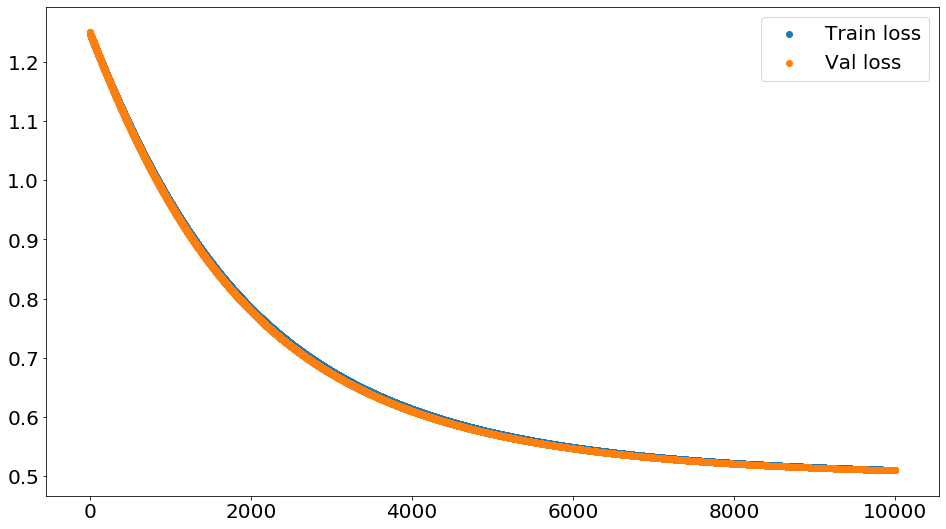

In [38]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(l_regression_1.loss)),l_regression_1.loss,label='Train loss')
plt.scatter(range(len(l_regression_1.val_loss)),l_regression_1.val_loss,label='Val loss')
plt.legend();

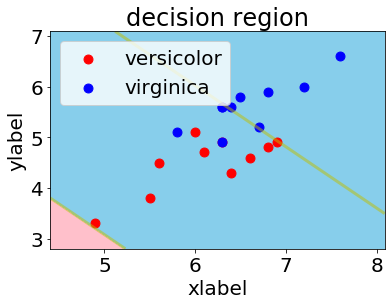

In [46]:
# problem 7
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict_proba(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
decision_region(X_test_1, y_test_1, l_regression_1)

### Problem 8

In [109]:
import pickle 

pickle.dumps(l_regression_1.weights)

b'\x80\x03cnumpy.core.multiarray\n_reconstruct\nq\x00cnumpy\nndarray\nq\x01K\x00\x85q\x02C\x01bq\x03\x87q\x04Rq\x05(K\x01K\x04\x85q\x06cnumpy\ndtype\nq\x07X\x02\x00\x00\x00f8q\x08K\x00K\x01\x87q\tRq\n(K\x03X\x01\x00\x00\x00<q\x0bNNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x0cb\x89C E\xf8(\\\xefO\xca@\xc1\xba\x1e\x85oJ\xb1@4\xba\x1e\x85\xd7(\xc5@\xf5S\xb8\x1eU\xd9\x9f@q\rtq\x0eb.'

In [110]:
from tempfile import TemporaryFile

outfile = TemporaryFile()
np.savez(outfile, l_regression_1.weights)